In [1]:
import tensorflow as tf
import numpy as np
import my_func as mf
import matplotlib.pyplot as plt
import random

### Load the dataset
The training data and testing data have been flattened into m by n matrices, where m is the number of samples, and n number of features. Note that the dummy 1 has been added to the last column of train_data and test_data, so that the bias can be combined with the weight matrix.

In [2]:
train_data = np.loadtxt('my_train_data.txt', np.float32)
test_data = np.loadtxt('my_test_data.txt', np.float32)
train_label = np.loadtxt('my_train_label.txt', np.float32)
test_label = np.loadtxt('my_test_label.txt', np.float32)

In [3]:
hm_train_data = 25112
hm_test_data = 4982
hm_classes = 5
train_data /= 255
test_data /= 255
train_data = np.hstack((train_data, np.ones((hm_train_data, 1), dtype=np.float32)))
test_data = np.hstack((test_data, np.ones((hm_test_data, 1), dtype=np.float32)))
feature_dim = int(28 * 28) + 1

### Setup hyperparams for training the regressor 

In [4]:
learning_rate = 0.0008
learning_epoch = 25
eval_interval = 20
batch_size = 50
reg_lambda = 0.005

In [5]:
x = tf.placeholder(tf.float32, shape=(None, feature_dim))
y = tf.placeholder(tf.float32, shape=(None, hm_classes))
weights = tf.Variable(tf.truncated_normal([feature_dim, hm_classes], 0.1, 0.01) / 10)
w = np.zeros([feature_dim, hm_classes], dtype=np.float32)
track_train_loss = np.array([])
track_test_loss = np.array([])

### Define the computational operation for the multi-class logistic regressor
#### Compute the mean squared loss (Negative Conditional Log-likelihood)

In [6]:
train_loss = mf.compute_loss(weights, train_data, train_label, reg_lambda) / hm_train_data
test_loss = mf.compute_loss(weights, test_data, test_label, reg_lambda) / hm_test_data

#### Compute the training and testing accuracy

In [7]:
soft_prob, _ = mf.compute_softmax(weights, x)
correct = tf.equal(tf.argmax(soft_prob, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(correct, 'float'))

#### Compute the gradient and update the weights

In [8]:
grads = mf.compute_gradients(weights, x, y, reg_lambda)
weights = tf.assign_sub(weights, learning_rate * grads)

In [9]:
# sess.close()

### Initilize a session, and starting training

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for s in np.arange(learning_epoch):   
    
    # compute the initial training, testing loss and accuracy
    if s == 0:
        trl, tel = sess.run([train_loss, test_loss])
        tr_acc = sess.run([acc], feed_dict={x: train_data, y: train_label})
        te_acc = sess.run([acc], feed_dict={x: test_data, y: test_label})
        print('iteration', s)
        print('training loss:', trl, ', training accuracy:', tr_acc)
        print('testing loss', tel, 'test accuracy is', te_acc)
        
        track_train_loss = np.hstack((track_train_loss, trl))
        track_test_loss = np.hstack((track_test_loss, tel))
    
    # decay the learning rate every epoch
    print('Epoch: ', s + 1)
    learning_rate *= 0.8
    
    re_order = np.random.permutation(hm_train_data)
    for i in np.arange(int(np.floor(hm_train_data / batch_size))):
            batch_x = train_data[re_order[i * batch_size:(i + 1) * batch_size], :]
            batch_y = train_label[re_order[i * batch_size:(i + 1) * batch_size], :]
            
            # stochastic gradient descent method
            w = sess.run([weights], feed_dict={x: batch_x, y: batch_y})
            
            if i % eval_interval == 5:
                trl, tel = sess.run([train_loss, test_loss])
                tr_acc = sess.run([acc], feed_dict={x: train_data, y: train_label})
                te_acc = sess.run([acc], feed_dict={x: test_data, y: test_label})
                print('iteration', i)
                print('training loss:', trl, ', training accuracy:', tr_acc)
                print('testing loss', tel, 'test accuracy is', te_acc)
        
                track_train_loss = np.hstack((track_train_loss, trl))
                track_test_loss = np.hstack((track_test_loss, tel))

    
    
    

iteration 0
training loss: 1.61061 , training accuracy: [0.22953171]
testing loss 1.61073 test accuracy is [0.22681653]
Epoch:  1
iteration 5
training loss: 1.29142 , training accuracy: [0.7879898]
testing loss 1.27835 test accuracy is [0.80630267]
iteration 25
training loss: 0.777955 , training accuracy: [0.84549218]
testing loss 0.751473 test accuracy is [0.86370933]
iteration 45
training loss: 0.595247 , training accuracy: [0.88149095]
testing loss 0.563531 test accuracy is [0.90244883]
iteration 65
training loss: 0.503356 , training accuracy: [0.88905704]
testing loss 0.468893 test accuracy is [0.91128063]
iteration 85
training loss: 0.448621 , training accuracy: [0.90195924]
testing loss 0.413386 test accuracy is [0.92051387]
iteration 105
training loss: 0.412107 , training accuracy: [0.9014017]
testing loss 0.379126 test accuracy is [0.91971093]
iteration 125
training loss: 0.382756 , training accuracy: [0.910043]
testing loss 0.348763 test accuracy is [0.92673624]
iteration 145


iteration 325
training loss: 0.198089 , training accuracy: [0.94174099]
testing loss 0.184799 test accuracy is [0.94580489]
iteration 345
training loss: 0.197674 , training accuracy: [0.94174099]
testing loss 0.184705 test accuracy is [0.94520271]
iteration 365
training loss: 0.19768 , training accuracy: [0.94217902]
testing loss 0.185569 test accuracy is [0.9439984]
iteration 385
training loss: 0.196401 , training accuracy: [0.94205958]
testing loss 0.183934 test accuracy is [0.94439983]
iteration 405
training loss: 0.196072 , training accuracy: [0.9428162]
testing loss 0.183518 test accuracy is [0.9439984]
iteration 425
training loss: 0.196028 , training accuracy: [0.9428162]
testing loss 0.183082 test accuracy is [0.94439983]
iteration 445
training loss: 0.195416 , training accuracy: [0.94229853]
testing loss 0.182685 test accuracy is [0.94500202]
iteration 465
training loss: 0.195954 , training accuracy: [0.94209939]
testing loss 0.182524 test accuracy is [0.94439983]
iteration 485

iteration 185
training loss: 0.178577 , training accuracy: [0.94651961]
testing loss 0.170578 test accuracy is [0.94660777]
iteration 205
training loss: 0.177952 , training accuracy: [0.94636029]
testing loss 0.170915 test accuracy is [0.94761139]
iteration 225
training loss: 0.176789 , training accuracy: [0.94687802]
testing loss 0.169956 test accuracy is [0.94761139]
iteration 245
training loss: 0.176604 , training accuracy: [0.94727618]
testing loss 0.169541 test accuracy is [0.94781214]
iteration 265
training loss: 0.177143 , training accuracy: [0.94643992]
testing loss 0.170154 test accuracy is [0.94660777]
iteration 285
training loss: 0.176862 , training accuracy: [0.94655943]
testing loss 0.169263 test accuracy is [0.9474107]
iteration 305
training loss: 0.176576 , training accuracy: [0.94659925]
testing loss 0.169166 test accuracy is [0.94700921]
iteration 325
training loss: 0.175898 , training accuracy: [0.9470771]
testing loss 0.168916 test accuracy is [0.94781214]
iteration 

iteration 45
training loss: 0.168901 , training accuracy: [0.94855052]
testing loss 0.163903 test accuracy is [0.94861501]
iteration 65
training loss: 0.168227 , training accuracy: [0.94958586]
testing loss 0.164212 test accuracy is [0.94901645]
iteration 85
training loss: 0.168123 , training accuracy: [0.95010352]
testing loss 0.164524 test accuracy is [0.94961864]
iteration 105
training loss: 0.168095 , training accuracy: [0.94954604]
testing loss 0.16346 test accuracy is [0.94881576]
iteration 125
training loss: 0.167401 , training accuracy: [0.94950622]
testing loss 0.163823 test accuracy is [0.94901645]
iteration 145
training loss: 0.167358 , training accuracy: [0.94930708]
testing loss 0.163578 test accuracy is [0.94801283]
iteration 165
training loss: 0.167107 , training accuracy: [0.94922745]
testing loss 0.163499 test accuracy is [0.94841427]
iteration 185
training loss: 0.167219 , training accuracy: [0.94950622]
testing loss 0.16389 test accuracy is [0.94821358]
iteration 205

iteration 405
training loss: 0.162405 , training accuracy: [0.95062119]
testing loss 0.160217 test accuracy is [0.94941789]
iteration 425
training loss: 0.162589 , training accuracy: [0.95018315]
testing loss 0.160301 test accuracy is [0.94981933]
iteration 445
training loss: 0.161912 , training accuracy: [0.95022303]
testing loss 0.159783 test accuracy is [0.94981933]
iteration 465
training loss: 0.161611 , training accuracy: [0.95062119]
testing loss 0.16016 test accuracy is [0.94941789]
iteration 485
training loss: 0.161889 , training accuracy: [0.95070088]
testing loss 0.160867 test accuracy is [0.94901645]
Epoch:  12
iteration 5
training loss: 0.161539 , training accuracy: [0.95058137]
testing loss 0.160186 test accuracy is [0.94961864]
iteration 25
training loss: 0.161509 , training accuracy: [0.95062119]
testing loss 0.160197 test accuracy is [0.95042151]
iteration 45
training loss: 0.161654 , training accuracy: [0.95066106]
testing loss 0.160859 test accuracy is [0.94981933]
it

iteration 245
training loss: 0.15779 , training accuracy: [0.95165658]
testing loss 0.157342 test accuracy is [0.95042151]
iteration 265
training loss: 0.157706 , training accuracy: [0.95213443]
testing loss 0.157368 test accuracy is [0.95122439]
iteration 285
training loss: 0.157483 , training accuracy: [0.95229375]
testing loss 0.156898 test accuracy is [0.9510237]
iteration 305
training loss: 0.157852 , training accuracy: [0.95213443]
testing loss 0.157305 test accuracy is [0.95082295]
iteration 325
training loss: 0.157441 , training accuracy: [0.95229375]
testing loss 0.157033 test accuracy is [0.9510237]
iteration 345
training loss: 0.158056 , training accuracy: [0.95281142]
testing loss 0.158104 test accuracy is [0.95082295]
iteration 365
training loss: 0.157932 , training accuracy: [0.9527716]
testing loss 0.157327 test accuracy is [0.95122439]
iteration 385
training loss: 0.158992 , training accuracy: [0.95201498]
testing loss 0.158794 test accuracy is [0.95082295]
iteration 40

iteration 85
training loss: 0.154513 , training accuracy: [0.95376712]
testing loss 0.156214 test accuracy is [0.95162582]
iteration 105
training loss: 0.154851 , training accuracy: [0.95388657]
testing loss 0.156624 test accuracy is [0.95082295]
iteration 125
training loss: 0.154512 , training accuracy: [0.95332909]
testing loss 0.156983 test accuracy is [0.95142514]
iteration 145
training loss: 0.154455 , training accuracy: [0.95332909]
testing loss 0.156746 test accuracy is [0.95162582]
iteration 165
training loss: 0.154235 , training accuracy: [0.9533689]
testing loss 0.155902 test accuracy is [0.95142514]
iteration 185
training loss: 0.154342 , training accuracy: [0.95332909]
testing loss 0.156366 test accuracy is [0.9510237]
iteration 205
training loss: 0.15492 , training accuracy: [0.95281142]
testing loss 0.15598 test accuracy is [0.95122439]
iteration 225
training loss: 0.154298 , training accuracy: [0.95376712]
testing loss 0.155888 test accuracy is [0.95142514]
iteration 245

iteration 445
training loss: 0.152021 , training accuracy: [0.95380694]
testing loss 0.155034 test accuracy is [0.95142514]
iteration 465
training loss: 0.151988 , training accuracy: [0.95392638]
testing loss 0.154063 test accuracy is [0.95062226]
iteration 485
training loss: 0.151805 , training accuracy: [0.95424497]
testing loss 0.154069 test accuracy is [0.95082295]
Epoch:  20
iteration 5
training loss: 0.152159 , training accuracy: [0.95376712]
testing loss 0.154645 test accuracy is [0.95122439]
iteration 25
training loss: 0.152378 , training accuracy: [0.95352817]
testing loss 0.154762 test accuracy is [0.95142514]
iteration 45
training loss: 0.151782 , training accuracy: [0.95400608]
testing loss 0.154452 test accuracy is [0.95242876]
iteration 65
training loss: 0.151708 , training accuracy: [0.95420516]
testing loss 0.154884 test accuracy is [0.95222801]
iteration 85
training loss: 0.152997 , training accuracy: [0.95428479]
testing loss 0.155906 test accuracy is [0.95122439]
ite

iteration 285
training loss: 0.150475 , training accuracy: [0.95444411]
testing loss 0.153713 test accuracy is [0.95022082]
iteration 305
training loss: 0.15001 , training accuracy: [0.95472282]
testing loss 0.154078 test accuracy is [0.95182657]
iteration 325
training loss: 0.149892 , training accuracy: [0.95456356]
testing loss 0.153828 test accuracy is [0.95202732]
iteration 345
training loss: 0.149978 , training accuracy: [0.95424497]
testing loss 0.154129 test accuracy is [0.95262945]
iteration 365
training loss: 0.15153 , training accuracy: [0.95404589]
testing loss 0.155687 test accuracy is [0.95122439]
iteration 385
training loss: 0.149643 , training accuracy: [0.95460337]
testing loss 0.153768 test accuracy is [0.95262945]
iteration 405
training loss: 0.149719 , training accuracy: [0.95424497]
testing loss 0.153615 test accuracy is [0.95202732]
iteration 425
training loss: 0.149929 , training accuracy: [0.95464319]
testing loss 0.154935 test accuracy is [0.95182657]
iteration 

iteration 125
training loss: 0.148009 , training accuracy: [0.95587766]
testing loss 0.152213 test accuracy is [0.95182657]
iteration 145
training loss: 0.148068 , training accuracy: [0.95555907]
testing loss 0.153276 test accuracy is [0.95242876]
iteration 165
training loss: 0.148754 , training accuracy: [0.95547944]
testing loss 0.154174 test accuracy is [0.95222801]
iteration 185
training loss: 0.148565 , training accuracy: [0.95492196]
testing loss 0.154279 test accuracy is [0.95162582]
iteration 205
training loss: 0.147819 , training accuracy: [0.95512104]
testing loss 0.152843 test accuracy is [0.95162582]
iteration 225
training loss: 0.14795 , training accuracy: [0.95532018]
testing loss 0.152386 test accuracy is [0.95162582]
iteration 245
training loss: 0.147994 , training accuracy: [0.95500159]
testing loss 0.15282 test accuracy is [0.95082295]
iteration 265
training loss: 0.148087 , training accuracy: [0.9557184]
testing loss 0.153399 test accuracy is [0.95142514]
iteration 2

### Plot the weights as an image

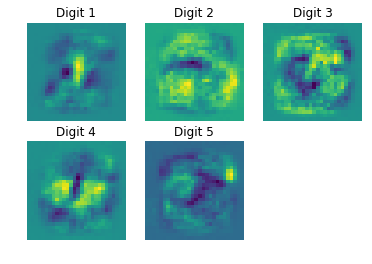

In [11]:
plt.figure(1)
plt.subplot(231)
img = w[0][0:28*28, 0].reshape(28,28)
plt.imshow(img)
plt.title('Digit 1')
plt.axis('off')

plt.subplot(232)
img = w[0][0:28*28, 1].reshape(28,28)
plt.imshow(img)
plt.title('Digit 2')
plt.axis('off')

plt.subplot(233)
img = w[0][0:28*28, 2].reshape(28,28)
plt.imshow(img)
plt.title('Digit 3')
plt.axis('off')

plt.subplot(234)
img = w[0][0:28*28, 3].reshape(28,28)
plt.imshow(img)
plt.title('Digit 4')
plt.axis('off')

plt.subplot(235)
img = w[0][0:28*28, 4].reshape(28,28)
plt.imshow(img)
plt.title('Digit 5')
plt.axis('off')


plt.show()

### Compute the final classification accuracy for each digit

In [12]:
for i in np.arange(5):
    rows, _ = np.nonzero(test_label[:, i][:, None])
    exp_terms = np.exp(np.dot(test_data[rows, :], w[0]))
    prob = exp_terms / np.sum(exp_terms, axis=1, keepdims=True)
    max_ind = np.argmax(prob, axis=1)
    one_hot_max = np.zeros([np.size(rows), hm_classes])
    for j in np.arange(np.size(rows)):
        one_hot_max[j, int(max_ind[j])] = 1
        
    error_rate = np.count_nonzero(one_hot_max - test_label[rows, :]) / (2 * np.size(rows))
    print('Digit', i + 1, 'testing accuracy:', 1 - error_rate)

Digit 1 testing accuracy: 0.9859022556390977
Digit 2 testing accuracy: 0.9535353535353536
Digit 3 testing accuracy: 0.9310679611650485
Digit 4 testing accuracy: 0.9735503560528993
Digit 5 testing accuracy: 0.9092896174863387


### Plot the learning curves w.r.t. the training and testing loss

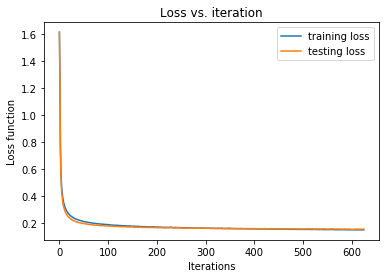

In [13]:
xl = np.arange(np.size(track_train_loss))
plt.plot(xl, track_train_loss, label='training loss')
plt.plot(xl, track_test_loss, label='testing loss')
plt.title('Loss vs. iteration')

plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend()
plt.show()